# Neural network for regression

## The model

We will hope to approximate the function

\begin{equation}
    f(x,y) = -(x(x-1)+y(1-y)) + \frac{1}{2} \cos(xy)\sin(2x+y),
\end{equation}

in the range $[-3,3]$ using a neural network.

In [1]:
import numpy as np

def func2approx(x,y):
    f = -(x * (x - 1) + y * (1 - y)) + 0.5 * np.cos(x * y) * np.sin(2 * x + y)
    return f

def generate_data(num_samples):
    X = np.random.rand(num_samples, 2)
    y = func2approx(X[:, 0], X[:, 1])
    return X, y

2025-11-16 17:59:23.308626: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-16 17:59:24.072600: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-16 17:59:26.485881: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/alex/projects/m1_work/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95:

float64
(1000, 2)
float64
(1000,)
Epoch 1/100


2025-11-16 17:59:30.926849: I external/local_xla/xla/service/service.cc:163] XLA service 0x788e80017100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-16 17:59:30.926885: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-11-16 17:59:30.957074: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-16 17:59:31.086275: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0463 - mae: 0.1758

I0000 00:00:1763315971.787796  499152 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0353 - mae: 0.1528
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0320 - mae: 0.1467
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0330 - mae: 0.1499
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0317 - mae: 0.1451
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0315 - mae: 0.1466
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0310 - mae: 0.1445
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0314 - mae: 0.1459
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0315 - mae: 0.1462
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0330 - mae: 0.1487
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0323 - mae: 0.1461
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0308 - mae: 0.1446
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0313 - mae: 0.1454
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

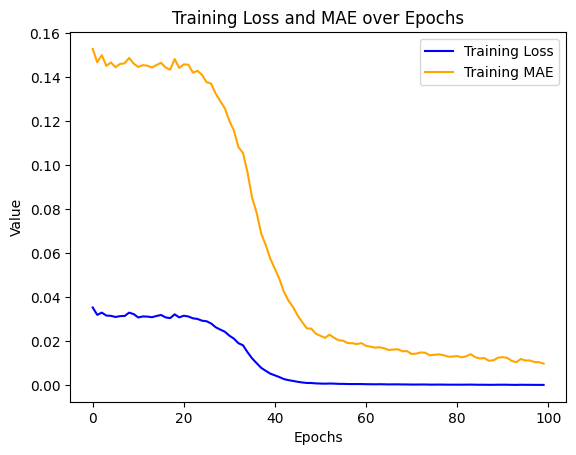

Test Loss: 0.00019903213251382113, Test MAE: 0.011722133494913578


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

model = Sequential([tf.keras.layers.Dense(5, activation="sigmoid", input_shape=(2,), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)), 
                   tf.keras.layers.Dense(10, activation="sigmoid", kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)), 
                   tf.keras.layers.Dense(1, activation="linear", kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None))])

model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error", metrics=["mae"])
# Generate synthetic data
np.random.seed(0)
num_samples = 1000
X, y = generate_data(num_samples)
print(X.dtype)
print(X.shape)
print(y.dtype)
print(y.shape)
# Train the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=1)
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['mae'], label='Training MAE', color='orange')
plt.title('Training Loss and MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

# Generate test data
X_test, y_test = generate_data(200)
# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

## Scanning through hyperparameters

We will use optuna to scan through different values of hyperparameters. We will use 2 hidden layers with a linear activation output layer. We will vary the number of nodes in the hidden layers (5, 10, 25, 50, 100), the activation function for each hidden layer (sigmoid, ReLU, tanh, CeLU, GELU, ELU, leaky ReLU), random weight range (0.05, 0.5, 5, 50), optimiser (Adam, SGD, SGD with momentum, RMSProp, AdaGrad), batch size (2, 4, 8, 16, 32, 64), epochs (2, 4, 8, 16, 32, 64, 128).

In [ ]:
import optuna
from optuna.visualization import plot_optimization_history, plot_intermediate_values, plot_contour, plot_param_importances
from optuna.trial import TrialState

def objective(trial):

    model = Sequential([
        tf.keras.layers.Dense(trial.suggest_categorical('units1', [5, 10, 25, 50, 100]), 
                              activation=trial.suggest_categorical('activation1', ['sigmoid', 'relu', 'tanh', 'celu', 'gelu', 'elu', 'leaky_relu']), 
                              input_shape=(2,), 
                              kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)),
        tf.keras.layers.Dense(trial.suggest_categorical('units2', [5, 10, 25, 50, 100]), 
                              activation=trial.suggest_categorical('activation2', ['sigmoid', 'relu', 'tanh', 'celu', 'gelu', 'elu', 'leaky_relu']), 
                              kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None)),
        tf.keras.layers.Dense(1, activation="linear", 
                              kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=None))
    ])

    X_train, y_train = generate_data(800)

    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'SGD', 'RMSprop', 'Adagrad'])
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=0.01)
    elif optimizer_name == 'SGD':
        optimizer = SGD(learning_rate=0.01)
    elif optimizer_name == 'RMSprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
    else:  # Adagrad
        optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
    
    model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mae"])
    model.fit(X_train, y_train, 
              epochs=trial.suggest_categorical('epochs', [2, 4, 8, 16, 32, 64, 128]), 
              batch_size=trial.suggest_categorical('batch_size', [2, 4, 8, 16, 32, 64]), 
              verbose=0)

    X_val, y_val = generate_data(200)

    for step in range(1, 11):
        intermediate_value = model.evaluate(X_val, y_val, verbose=0)[1]
        trial.report(intermediate_value, step)

    if trial.should_prune():
            raise optuna.TrialPruned()

    val_mae = model.evaluate(X_val, y_val, verbose=0)[1]
    return val_mae

study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100, timeout=600)
pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])
print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-11-16 18:34:29,640] A new study created in memory with name: no-name-231ef64f-4141-43bd-8f69-6118f7dbf160
[I 2025-11-16 18:34:33,871] Trial 0 finished with value: 0.13159815967082977 and parameters: {'units1': 5, 'activation1': 'elu', 'weight_range': 0.5, 'units2': 50, 'activation2': 'leaky_relu', 'optimizer': 'Adam', 'epochs': 4, 'batch_size': 64}. Best is trial 0 with value: 0.13159815967082977.
[I 2025-11-16 18:34:36,987] Trial 1 finished with value: 0.1406855434179306 and parameters: {'units1': 25, 'activation1': 'sigmoid', 'weight_range': 0.5, 'units2': 5, 'activation2': 'relu', 'optimizer': 'Adam', 'epochs': 2, 'batch_size': 16}. Best is trial 0 with value: 0.13159815967082977.
[I 2025-11-16 18:34:41,511] Trial 2 finished with value: 0.1358308643102646 and parameters: {'units1': 50, 'activation1': 'relu', 'weight_range': 0.05, 'units2': 50, 'activation2': 'relu', 'optimizer': 'Adam', 'epochs': 4, 'batch_size': 16}. Best is trial 0 with value: 0.13159815967082977.
[I 2025-

Study statistics: 
  Number of finished trials:  32
  Number of pruned trials:  15
  Number of complete trials:  17
Best trial:
  Value:  0.0036787944845855236
  Params: 
    units1: 100
    activation1: leaky_relu
    weight_range: 0.5
    units2: 10
    activation2: tanh
    optimizer: SGD
    epochs: 128
    batch_size: 2
